## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

In [2]:
df = pd.read_csv('titanic_train.csv', index_col=0)

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis



## Missing Data

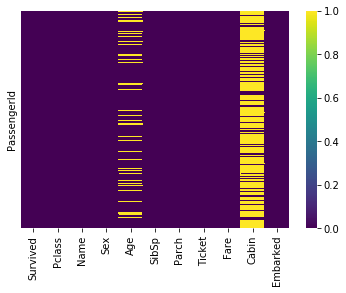

In [7]:
#Visualizing missing Data
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [8]:
df.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


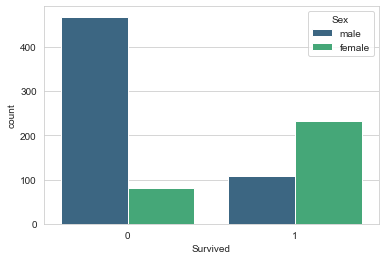

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='viridis')

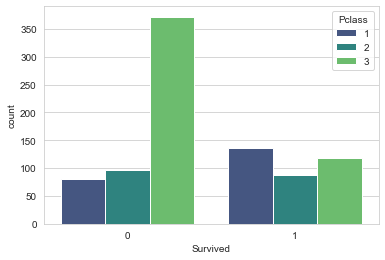

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='viridis')

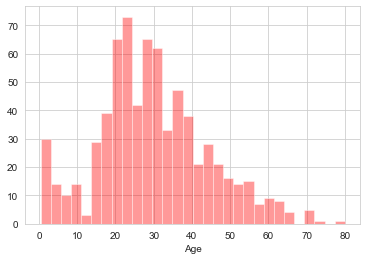

In [11]:
sns.set_style('whitegrid')
sns.distplot(df['Age'].dropna(),kde=False,color='r',bins=30)

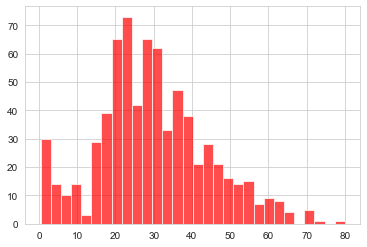

In [12]:
df['Age'].hist(bins=30,color='red',alpha=0.7)

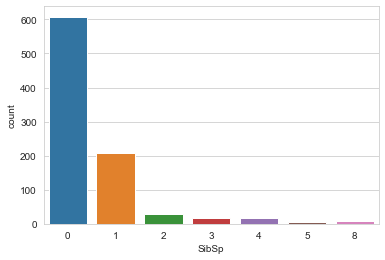

In [13]:
sns.countplot(x='SibSp',data=df)

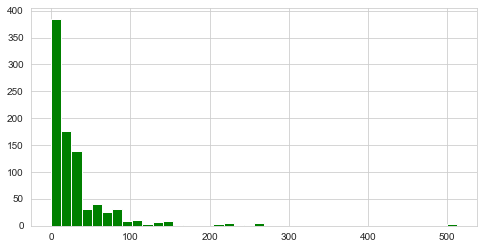

In [14]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Cleaning the Data

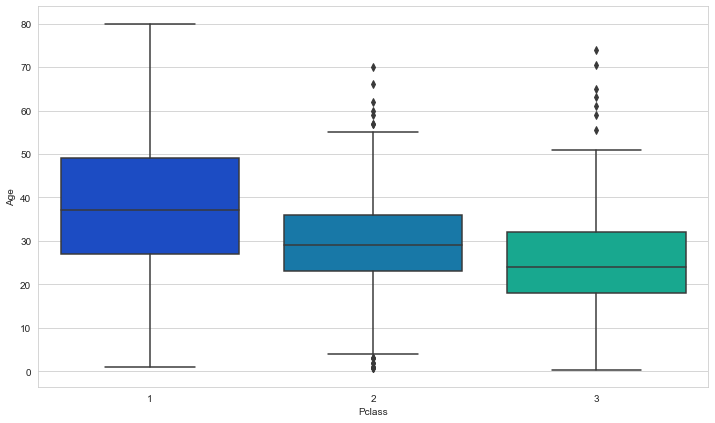

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [20]:
pclass = [1,2,3]
for i in pclass:
    a=df[df['Pclass']==i]['Age'].mean()
    print(f'for class {i} mean: {a}')

for class 1 mean: 38.233440860215055
for class 2 mean: 29.87763005780347
for class 3 mean: 25.14061971830986


In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

In [23]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

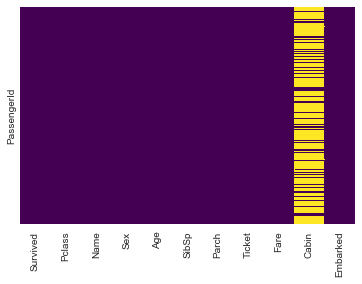

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Perfect! Now Let us deal with the Cabin column

In [25]:
df.drop('Cabin',axis=1,inplace=True)

In [26]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
#Dropping the missing row under the Embarked column

df.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [28]:
columns = list(df.columns)
for column in columns:
    num = df[column].nunique()
    print(f'{column} column has {num} unique values. \n\n {df[column].value_counts().head()}\n ------------------------------------')

Survived column has 2 unique values. 

 0    549
1    340
Name: Survived, dtype: int64
 ------------------------------------
Pclass column has 3 unique values. 

 3    491
1    214
2    184
Name: Pclass, dtype: int64
 ------------------------------------
Name column has 889 unique values. 

 Turpin, Mr. William John Robert         1
Doling, Mrs. John T (Ada Julia Bone)    1
Chronopoulos, Mr. Apostolos             1
Burns, Miss. Elizabeth Margaret         1
Saundercock, Mr. William Henry          1
Name: Name, dtype: int64
 ------------------------------------
Sex column has 2 unique values. 

 male      577
female    312
Name: Sex, dtype: int64
 ------------------------------------
Age column has 88 unique values. 

 25.0    159
38.0     40
29.0     31
24.0     30
22.0     27
Name: Age, dtype: int64
 ------------------------------------
SibSp column has 7 unique values. 

 0    606
1    209
2     28
4     18
3     16
Name: SibSp, dtype: int64
 ------------------------------------
Parch

In [29]:
df = pd.get_dummies(df, columns='Pclass Sex SibSp Parch Embarked'.split(), drop_first=True)

In [30]:
df.head()

,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,...,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
df.drop(columns=['Name','Ticket'], axis=1, inplace=True)
df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,38.0,71.2833,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,26.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,35.0,53.1000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,35.0,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Saving my Analytical Base Table

In [32]:
df.to_csv('ABT_Titanic.csv')

Now we have our Analytical Base Table

# Building a Logistic Regression model



#### Train Test Split

In [33]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [36]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression()


lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
predictions = lr.predict(X_test)

Let's move on to evaluate our model!

## Evaluation

In [41]:
from sklearn.metrics import classification_report, accuracy_score

In [42]:
def confusion_mat(actual, prediction):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    a=pd.DataFrame(confusion_matrix(actual,prediction), index='Positive Negative'.split(),
             columns='Positive Negative'.split())
    plt.figure(figsize=(5,5))
    ax=sns.heatmap(a, annot=True, fmt='.1f',linewidth=1., cbar=False)
    plt.title('Confusion Matrix')

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       163
           1       0.81      0.64      0.72       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



None
Accuracy: 80.14981273408239% 




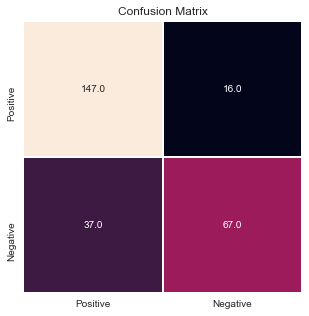

In [47]:
print(confusion_mat(y_test, predictions))

print(f'Accuracy: {accuracy_score(y_test, predictions)*100}% \n\n')